In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [188]:
data_file = 'immo.csv'
df = pd.read_csv(data_file)



In [378]:
df = pd.DataFrame(df)
df = df[['Type','Sub type', 'Price', 'NetHabitableSurface(msq)','street',  'ConstructionYear','BedroomCount', 'locality', 'FacadeCount', 'HeatingType', 'KitchekType']]
columns_to_n = ['Type', 'Sub type', 'street',  'locality', 'HeatingType', 'KitchekType']
columns_to_0 = ['Price', 'NetHabitableSurface(msq)', 'ConstructionYear', 'BedroomCount', 'FacadeCount']
df[columns_to_n] = df[columns_to_n].replace(np.nan, 'None')
df[columns_to_0] = df[columns_to_0].replace(np.nan, 0)

# age of building
list_years = []
for year in df['ConstructionYear']:
    years = 2022 - year
    list_years.append(years)
df = df.assign(ConstructionYear = list_years)

#encoder
labelencoder = LabelEncoder()
df['Type'] = labelencoder.fit_transform(df['Type'])

df['locality'] = labelencoder.fit_transform(df['locality'])
df['HeatingType'] = labelencoder.fit_transform(df['HeatingType'])
df['KitchekType'] = labelencoder.fit_transform(df['KitchekType'])
df['Sub type'] = labelencoder.fit_transform(df['Sub type'])
df['Sub type'] = labelencoder.fit_transform(df['Sub type'])
df['street'] = labelencoder.fit_transform(df['street'])



In [379]:
df.columns

Index(['Type', 'Sub type', 'Price', 'NetHabitableSurface(msq)', 'street',
       'ConstructionYear', 'BedroomCount', 'locality', 'FacadeCount',
       'HeatingType', 'KitchekType'],
      dtype='object')

In [429]:
X = np.array(df[['Sub type', 'KitchekType','Price', 'HeatingType','NetHabitableSurface(msq)','street','BedroomCount','Type']])
y = np.array(df['FacadeCount'])


In [430]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=41,  test_size=0.2)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>],
       [<AxesSubplot: title={'center': '3'}>,
        <AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>],
       [<AxesSubplot: title={'center': '6'}>,
        <AxesSubplot: title={'center': '7'}>, <AxesSubplot: >]],
      dtype=object)

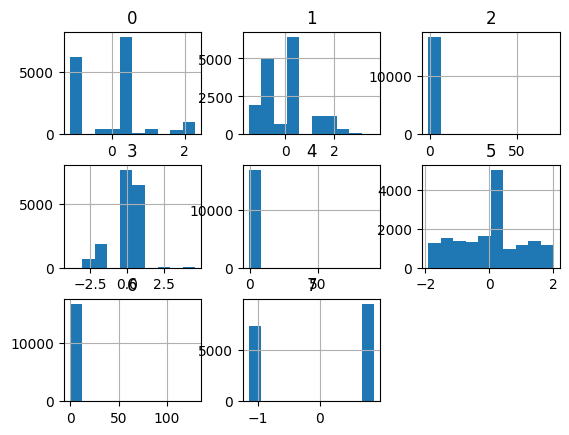

In [431]:
pd.DataFrame(X_train).hist()

# KNN

In [413]:
from sklearn.neighbors import KNeighborsClassifier

In [414]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_model.score(X_train,y_train)

0.6829007542911445

In [415]:
knn_model.predict(X_test)
knn_model.score(X_test, y_test)

0.5403800475059383

<AxesSubplot: >

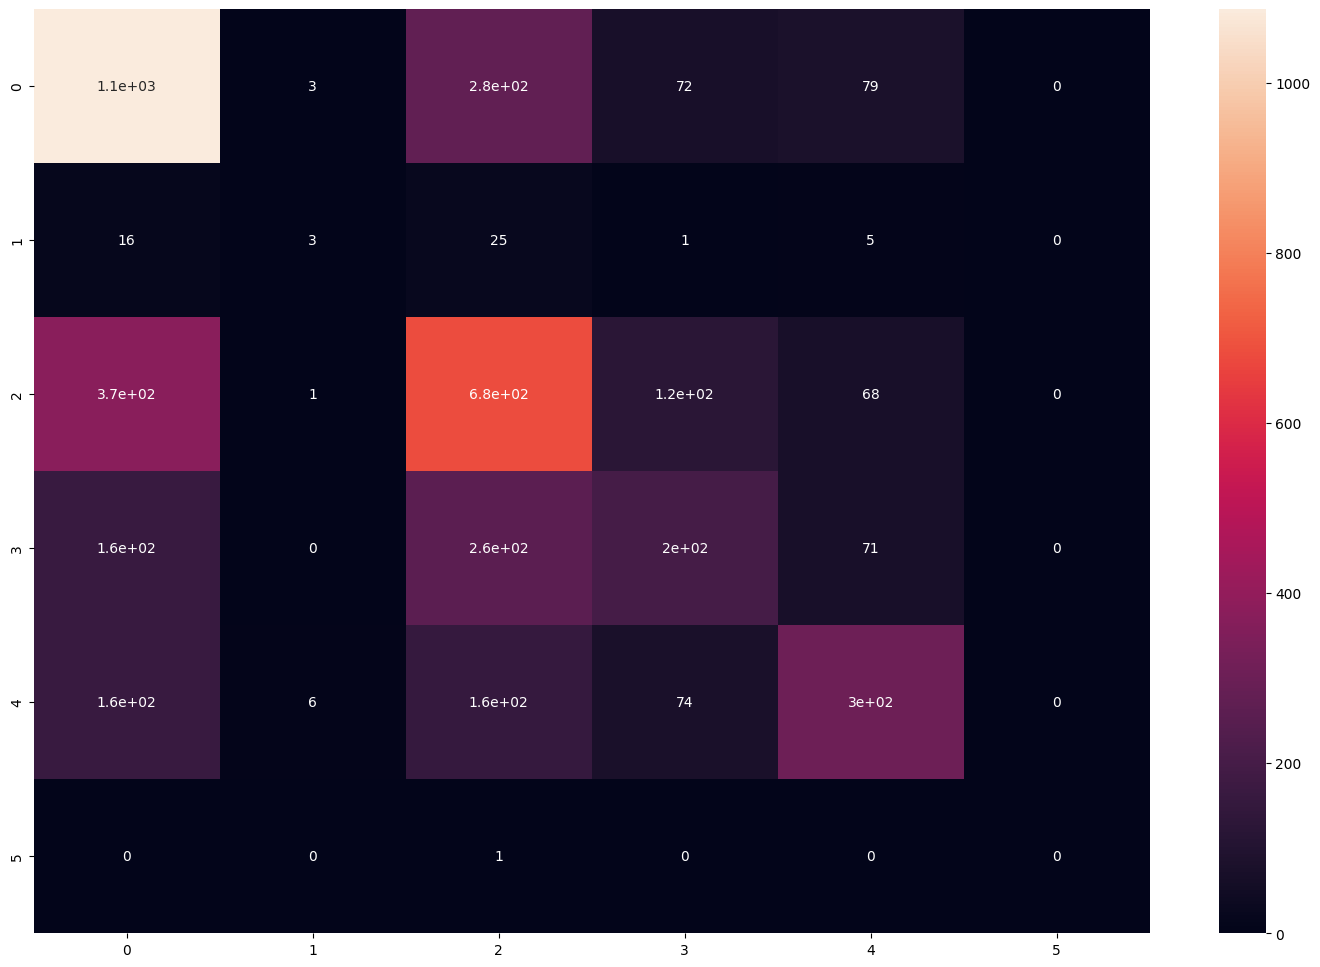

In [416]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_predict = knn_model.predict(X_test)
con_ma = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(18,12))
sn.heatmap(con_ma, annot=True)

# linear regression

In [432]:
regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_train, y_train)

0.17409628893501383

In [433]:
regression.predict(X_test)
regression.score(X_test, y_test)

0.1814324079248516

# random tree